# Naive Bayes Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [2]:
# Load data

df = pd.read_csv('amazon_reviews.csv')
print(df.head(5), len(df))

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1   3150


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB
None
            rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000


In [4]:
#df[df['feedback']==0]['verified_reviews']

# Positive reviews are marked as 1 and negative reviews are 0

### Data Exploration

<Axes: >

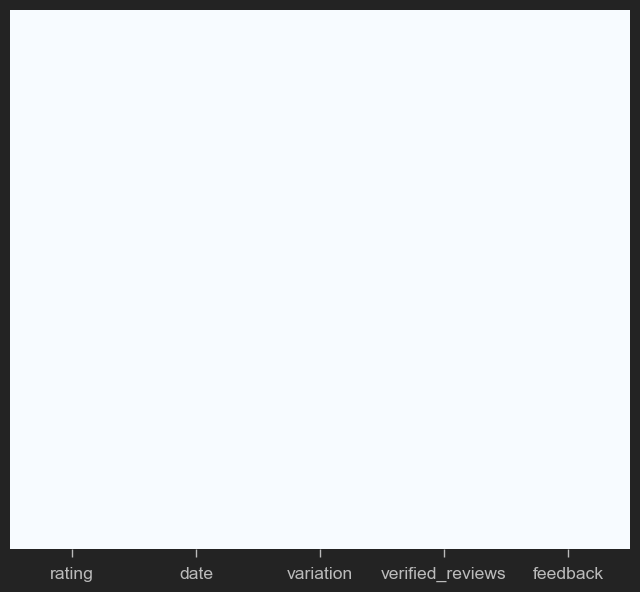

In [5]:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap='Blues')

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

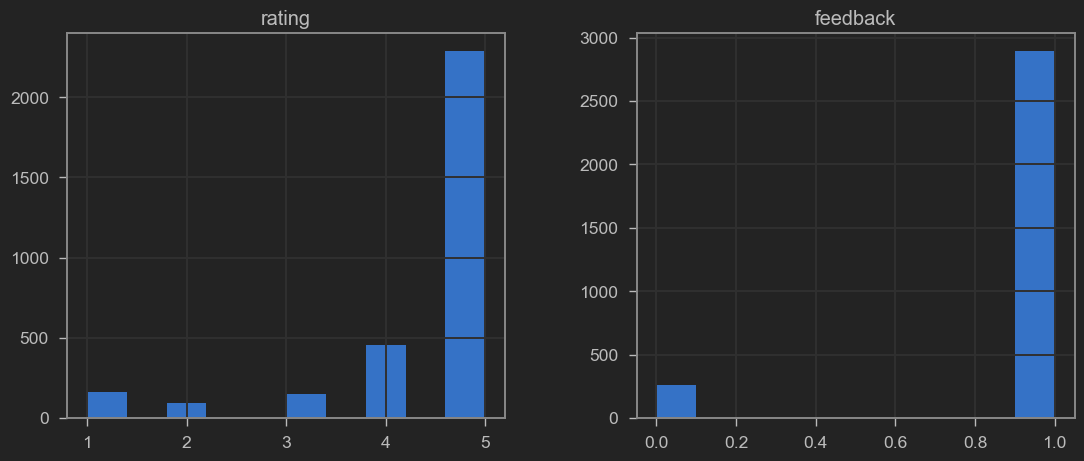

In [6]:
df.hist(figsize=(13, 5))

<Axes: ylabel='count'>

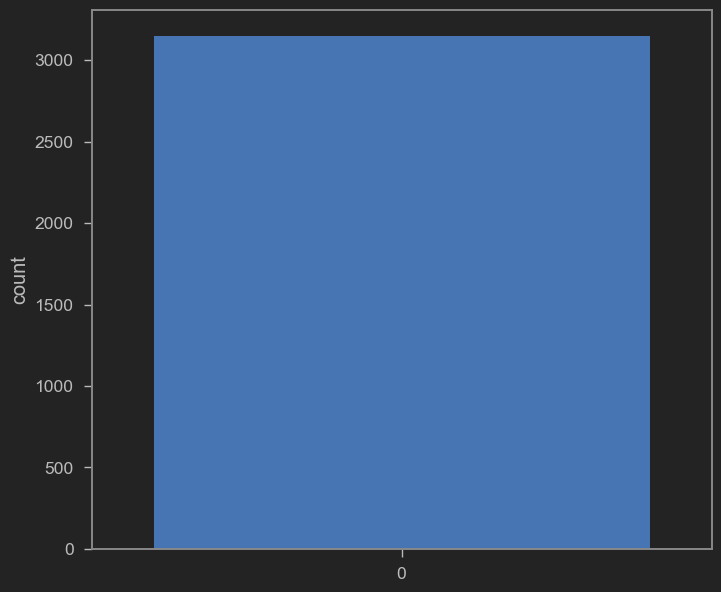

In [7]:
# Plot Count
sns.countplot(df['feedback'], label="Count")

In [8]:
# drop rows with null values in 'verified reviews'
df = df.dropna(subset=['verified_reviews'], inplace=False)

In [9]:
# Length of messages
df['length'] = df['verified_reviews'].apply(len)

In [10]:
df.head(3)
df.describe()

,rating,feedback,length
count,3149.000000,3149.000000,3149.000000
mean,4.463957,0.918704,132.090187
std,1.067773,0.273332,182.114569
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [11]:
df[df['length']==1]['verified_reviews']

60      😍
85       
183      
219      
374      
       ..
3114     
3120     
3123     
3126     
3141     
Name: verified_reviews, Length: 81, dtype: object

<Axes: >

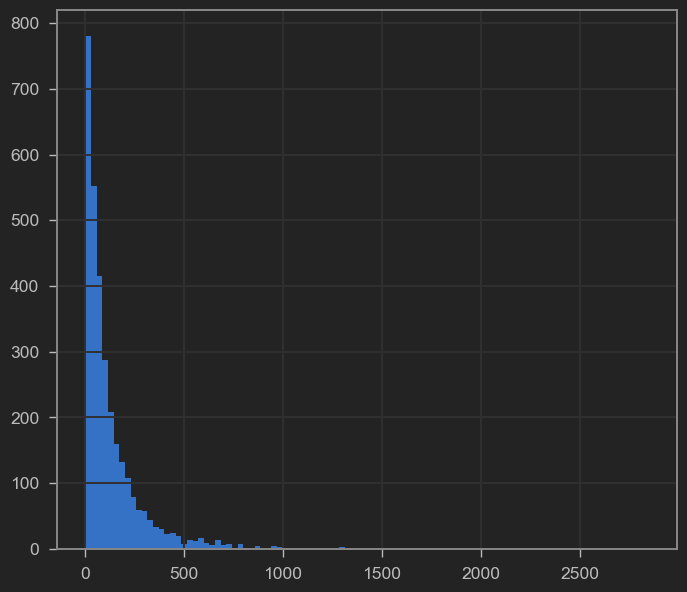

In [12]:
df['length'].hist(bins=100)

In [13]:
# Creating a Wordcloud

positive = df[df['feedback']==1]
negative = df[df['feedback']==0]
negative.head(5)

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [14]:
positive_sentences = positive['verified_reviews'].tolist()
negative_sentences = negative['verified_reviews'].tolist()

print(len(positive_sentences), len(negative_sentences))

positive_string = ' '.join(positive_sentences)
negative_string = ' '.join(negative_sentences)
#print(positive_string)

2893 256


In [15]:
#!pip install wordcloud

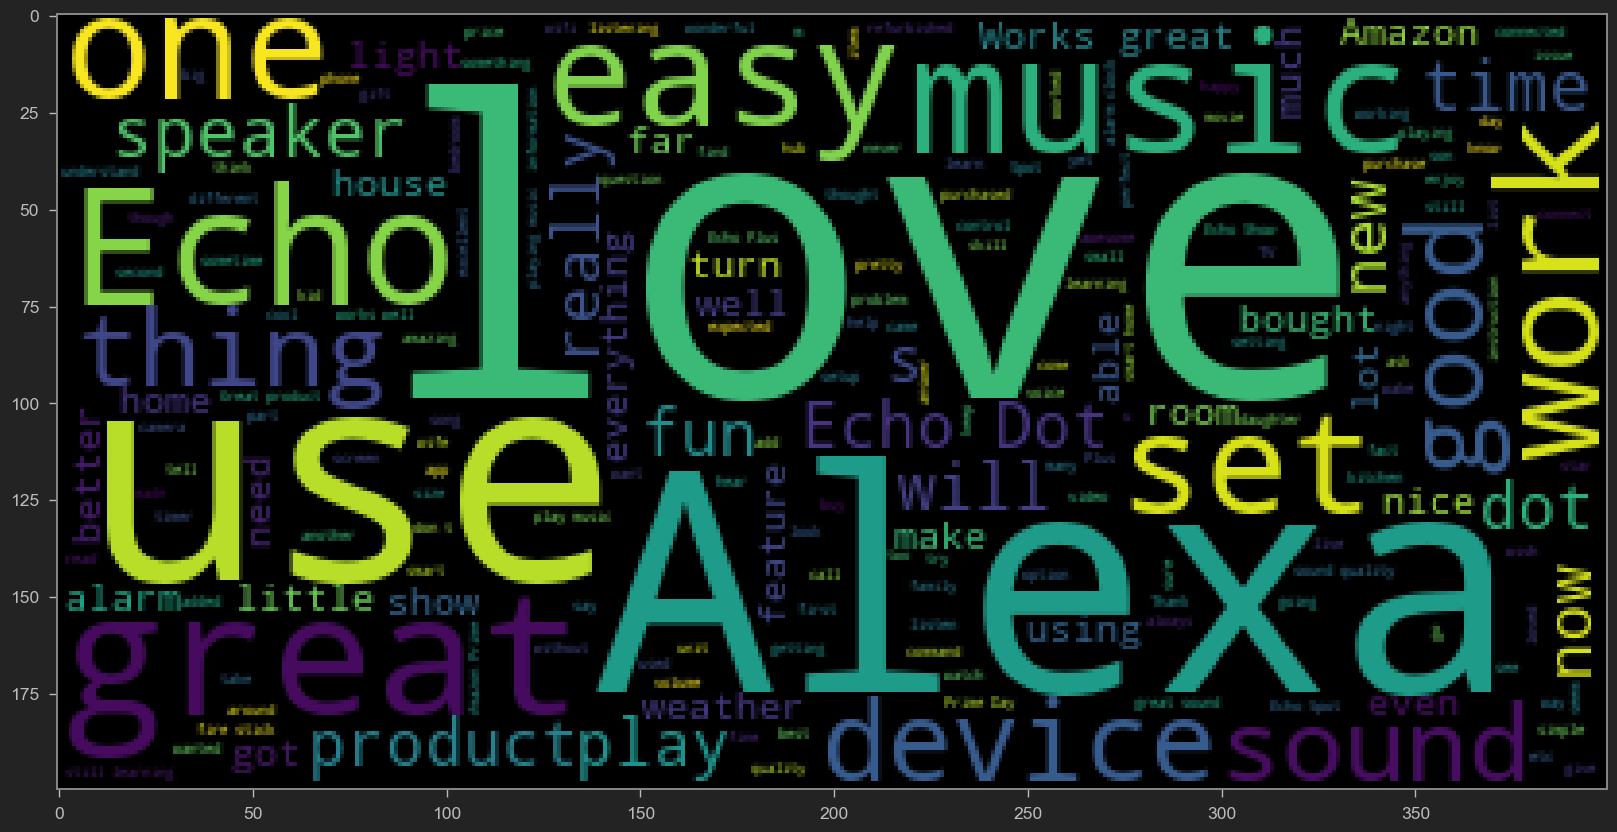

In [16]:
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(positive_string))


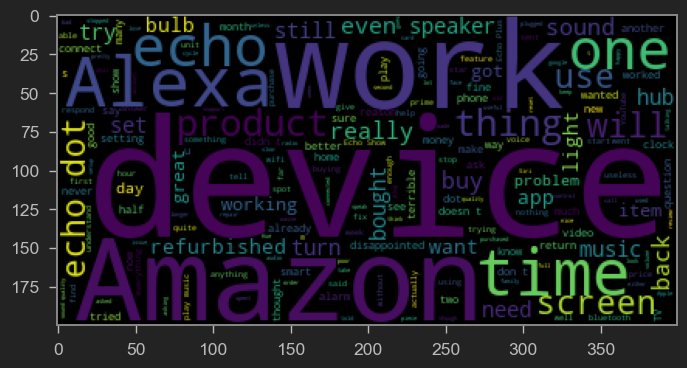

In [17]:
plt.imshow(WordCloud().generate(negative_string))

### Data Cleaning- Remove punctuation and Stop Words, Count Vectorization

In [18]:
import string
import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_join_clean

In [20]:
df_clean = df['verified_reviews'].apply(message_cleaning)

In [21]:
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
df_countvectorizer = vectorizer.fit_transform(df['verified_reviews'])

In [22]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [23]:
#print(df_countvectorizer)

In [24]:
df_countvectorizer.shape

(3149, 5211)

In [25]:
X = pd.DataFrame(df_countvectorizer.toarray())

In [26]:
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y= df['feedback']

### Train and Evaluate Naive Bayes Classifier Model

In [28]:
X.shape, y.shape

((3149, 5211), (3149,))

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

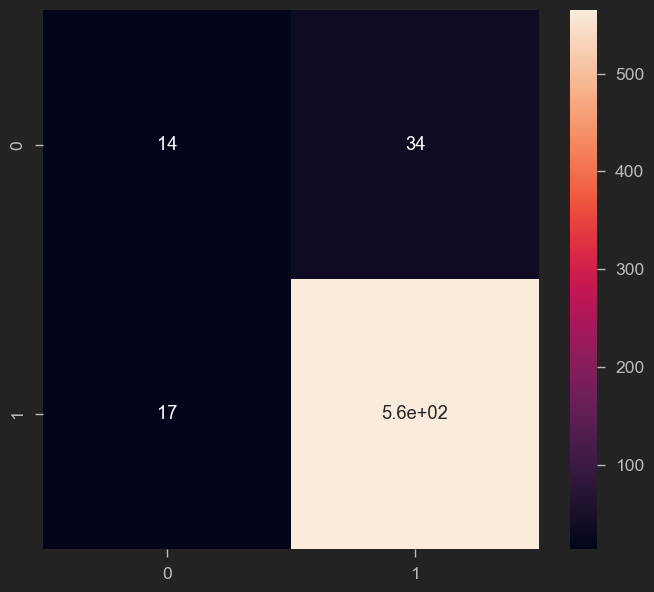

In [33]:
#Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [34]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.45      0.29      0.35        48
           1       0.94      0.97      0.96       582

    accuracy                           0.92       630
   macro avg       0.70      0.63      0.66       630
weighted avg       0.91      0.92      0.91       630



### Comparison with Logistic Regression and Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.71      0.25      0.37        48
           1       0.94      0.99      0.97       582

    accuracy                           0.93       630
   macro avg       0.82      0.62      0.67       630
weighted avg       0.92      0.93      0.92       630



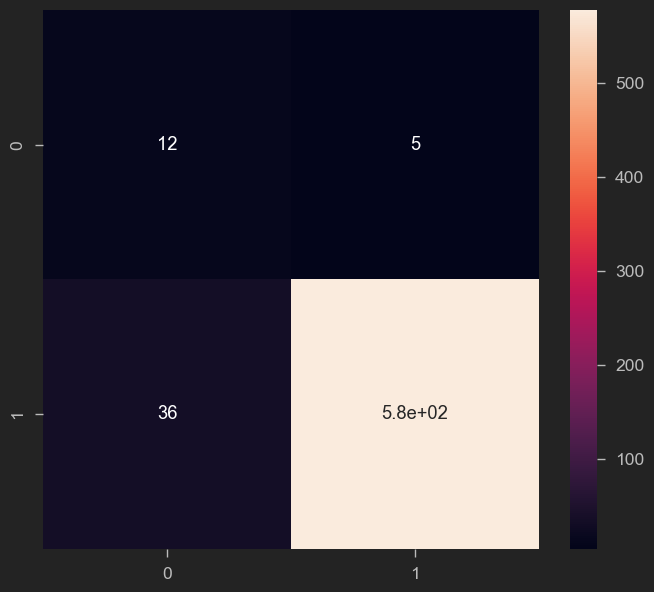

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.15      0.25        48
           1       0.93      1.00      0.96       582

    accuracy                           0.93       630
   macro avg       0.86      0.57      0.60       630
weighted avg       0.92      0.93      0.91       630



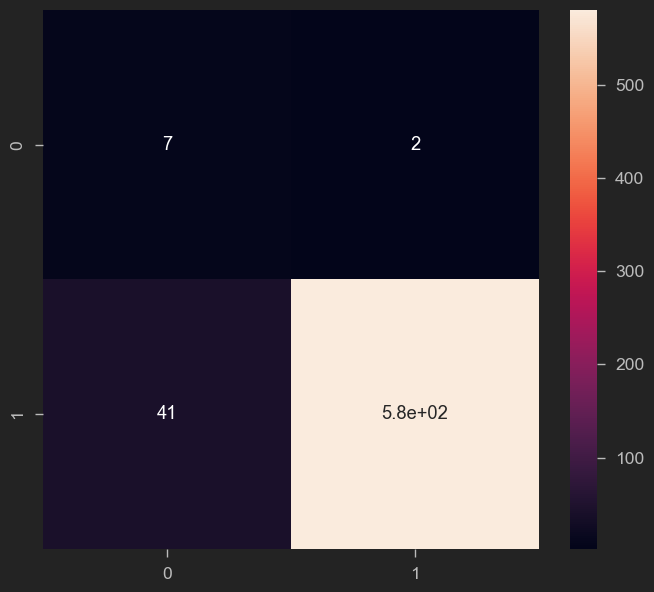

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))